## Subbox

In [13]:
from PIL import Image, ImageDraw, ImageFont
import import_ipynb
import random
# import from relate work
from ipynb.fs.full.signGen import signGen
from ipynb.fs.full.text_to_image import textToImage
import Date_Random

def mergeSubbox(bbox, closing_word_txt, name_title, name_txt, job_position_txt):
    # init
    sign_flag = False
    content_height = 50
    img_width = []
    font_size = 50
    fullname = name_title + ' ' + name_txt
    # find width, height
    width = bbox[1] - bbox[0]
    height = bbox[3] - bbox[2]
    # create blank image
    image = Image.new('RGB', (width, height), 'white')
    
    #ส่วนคำลงท้าย
    if(random.choice((True, False))):
        closing_word = textToImage([0,400,content_height, content_height+100], closing_word_txt, './standard/th/THSarabun.ttf',font_size, 1)
        closing_word_image = closing_word['image_obj']
        image.paste(closing_word_image, (int((width - closing_word_image.size[0])/2), content_height))
        content_height += closing_word_image.size[1]
    
    #ส่วนลายเซ็น
    if(random.choice((True, False))) : # sign?
        sign_flag = True
        txt_to_sign = random.choice((True, False)) # ใช้ลายมือชื่อไหม?
        if (txt_to_sign) :
            sign = signGen([0,400,content_height,content_height+200], name_txt, './handwriting/th/Sriracha-Regular.ttf', 100, range(-3,3), 15)
            sign_image = sign['image_obj']
            bb_sign = [int((width - sign_image.size[0])/2),int((width - sign_image.size[0])/2)+sign_image.size[0]
                       , content_height, content_height+ sign_image.size[1]]
            image.paste(sign_image, (int((width - sign_image.size[0])/2), content_height))
            content_height += 150
        else :
            path="./sign_img"
            files=os.listdir(path)
            img_file=random.choice(files)
            sign = Image.open(path+ '/' + img_file)  
            sign = sign.resize((400,150))
            bb_sign = [0,400
                       , content_height, sign.size[1]]
            image.paste(sign, (0, content_height))
            content_height += 150
    else:
        bb_sign = [0,400,content_height,content_height+200]
        content_height += 150
    
    #ส่วนคำนำหน้า+ชื่อ
    name = textToImage([0,400,content_height,content_height+100], fullname, './standard/th/THSarabun.ttf',font_size, 1)
    name_image = name['image_obj']
    bb_name = [int((width - name_image.size[0])/2), int((width - name_image.size[0])/2)+name_image.size[0]
               , content_height, content_height+name_image.size[1]]
    image.paste(name_image, (int((width - name_image.size[0])/2), content_height))
    content_height += name_image.size[1]
    
    #ส่วนตำแหน่งงาน
    job_position = textToImage([0,400,content_height,content_height+100], job_position_txt, './standard/th/THSarabun.ttf',font_size, 1)
    job_position_image = job_position['image_obj']
    bb_job_position = [int((width - job_position_image.size[0])/2), int((width - job_position_image.size[0])/2)+job_position_image.size[0]
                       , content_height, content_height+job_position_image.size[1]]
    image.paste(job_position_image, (int((width - job_position_image.size[0])/2), content_height))
    content_height += job_position_image.size[1]
    
    #ส่วนวันที่
    date = Date_Random.Gen_Date()
    random_date = textToImage([0,400,content_height,content_height+100], date['text'], './standard/th/THSarabun.ttf',font_size, 1)
    random_date_image = random_date['image_obj']
    bb_date = [int((width - random_date_image.size[0])/2), int((width - random_date_image.size[0])/2)+random_date_image.size[0]
               , content_height, content_height+random_date_image.size[1]]
    image.paste(random_date_image, (int((width - random_date_image.size[0])/2), content_height))
    content_height += random_date_image.size[1]
    
    #ส่วนของการอนุมัติ
    approve_word = ['ผู้อนุมัติ', 'ผู้นำเสนอ', 'ผู้ซื้อ', 'ผู้สั่งซื้อ']
    approve_word = random.choice((approve_word))
    approve = textToImage([0,400,content_height,content_height+100], approve_word, './standard/th/THSarabun.ttf',font_size, 1)
    approve_image = approve['image_obj']
    bb_approve = [int(width - approve_image.size[0])/2, int(width - approve_image.size[0])+approve_image.size[0]
                  , content_height,content_height+approve_image.size[1]]
    image.paste(approve_image, (int((width - approve_image.size[0])/2), content_height))
    content_height += approve_image.size[1]
    
    #ส่วนของการเบอร์โทร
    ph_no = '0'
    ph_no += str(random.choice((2, 8, 9)))
    for i in range(0, 8):
        ph_no +=  str(random.randint(0, 9))
    phone_num = textToImage([0,400,content_height,content_height+100], ph_no, './standard/th/THSarabun.ttf',font_size, 1)
    phone_num_image = phone_num['image_obj']
    bb_phone_num = [int((width - phone_num_image.size[0])/2), int((width - phone_num_image.size[0])/2)+phone_num_image.size[0]
                    , content_height, content_height+50]
    image.paste(phone_num_image, (int((width - phone_num_image.size[0])/2), content_height))
    content_height += phone_num_image.size[1]
    
    #Dict for Return
    out = {'image_obj':image, 'bbox':bbox
           , 'bb_sign':bb_sign, 'sign':sign_flag
           , 'bb_name':bb_name, 'name':name_txt
           , 'bb_jobposition':bb_job_position, 'jobposition_name':job_position_txt
           , 'bb_approve':bb_approve, 'approve_word':approve_word
           , 'bb_phone':bb_phone_num, 'phone_num':ph_no
           , 'bb_date':bb_date, 'date':date['text']}
    return out

ModuleNotFoundError: No module named 'ipynb.fs.full.signGen'

## Random Input For Sign

In [2]:
import pandas as pd
import os

def randomForSign():
    # Read Data
    df_name_eng = pd.read_csv('Name Eng.csv')
    df_name_thai = pd.read_csv('Name_th.csv', header=None)
    df_closing_word = pd.read_csv('Closing_word.csv', header=None)
    df_jobName = pd.read_excel('JobName.xlsx')
    df_nametitle = pd.read_csv('NameTitle.csv', header=None)
    # Processing Data
    df_name_eng = df_name_eng.rename(columns={'Name Eng':'name'})
    df_name_thai = df_name_thai.rename(columns={0:'name'})
    df_closing_word = df_closing_word.rename(columns={0:'closing_word'})
    df_name = pd.concat([df_name_eng, df_name_thai])
    df_jobName = df_jobName.stack().reset_index()
    df_nametitle = df_nametitle.rename(columns={0:'nametitle'})
    # DataFrame To List
    list_closing_word = df_closing_word['closing_word'].values.tolist()
    list_name = df_name['name'].values.tolist()
    list_jobname = df_jobName[0].values.tolist()
    list_nametitle = df_nametitle['nametitle'].values.tolist()
    # Random
    closing_word = random.choice(list_closing_word)
    name = random.choice(list_name)
    name_title = random.choice(list_nametitle)
    jobname = random.choice(list_jobname)
    return closing_word, name_title, name, jobname

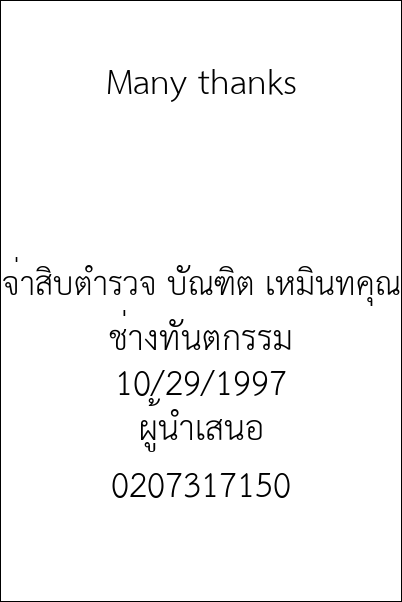

In [3]:
from PIL import Image, ImageOps

closing_word, name_title, name, jobname = randomForSign()

out = mergeSubbox([0,400,0,600], closing_word, name_title, name,  jobname)
ImageOps.expand(out['image_obj'], border=1, fill='black')